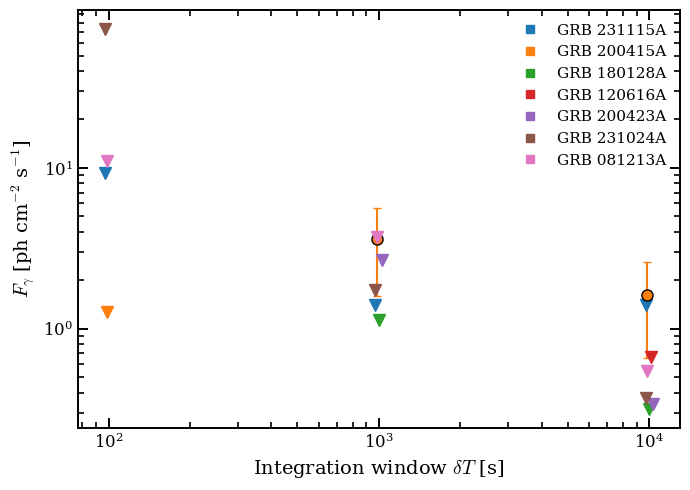

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# --- data: photon fluxes in 10^-6 ph cm^-2 s^-1 ---
data = {
    "GRB 231115A": {100: ("ul", 9.28, None), 1000: ("ul", 1.40, None), 10000: ("ul", 1.40, None)},
    "GRB 200415A": {100: ("ul", 1.26, None), 1000: ("det", 3.60, 2.00), 10000: ("det", 1.62, 0.96)},
    "GRB 180128A": {1000: ("ul", 1.13, None), 10000: ("ul", 0.315, None)},
    "GRB 120616A": {10000: ("ul", 0.67, None)},
    "GRB 200423A": {1000: ("ul", 2.67, None), 10000: ("ul", 0.34, None)},
    "GRB 231024A": {100: ("ul", 73.1, None), 1000: ("ul", 1.74, None), 10000: ("ul", 0.37, None)},
    "GRB 081213A": {100: ("ul", 11.1, None), 1000: ("ul", 3.69, None), 10000: ("ul", 0.548, None)},
}


durations = [100, 1000, 10000]

# ---- print-friendly sizing (single-column A4); bump by ~15% for full-width ----
import matplotlib as mpl

mpl.rcParams.update({
    # Figure size for print quality
    "figure.figsize": (7,5),
    "savefig.dpi": 300,

    # Font sizes
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 11,

    # Tick style
    "xtick.major.size": 7,
    "ytick.major.size": 7,
    "xtick.major.width": 1.4,
    "ytick.major.width": 1.4,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    "xtick.minor.width": 1.2,
    "ytick.minor.width": 1.2,

    # Axes style
    "axes.linewidth": 1.4,
    "axes.labelpad": 4,

    # Tick direction
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,

    # Fonts
    "font.family": "serif",
    "mathtext.fontset": "cm",
})


fig, ax = plt.subplots(figsize=(7.0, 5.0))

# stable color per event (tab10)
events = list(data.keys())
colors = {grb: f"C{i%10}" for i, grb in enumerate(events)}

# small log-jitter so overlapping points at the same ΔT are separable
jitter_ln = 0.015

handles_evt, labels_evt = [], []

for i, (grb, series) in enumerate(data.items()):
    col = colors[grb]
    # legend handle (color only)
    h, = ax.plot([], [], marker='s', linestyle='None', color=col)
    handles_evt.append(h); labels_evt.append(grb)

    for dt in durations:
        if dt not in series: 
            continue
        kind, val, err = series[dt]
        x = dt * np.exp(((i % 5) - 2) * jitter_ln)  # gentle jitter

        if kind == "det":
            # detections: filled circles with error bars
            ax.errorbar(
                x, val, yerr=err, fmt='o', color=col, mfc=col, mec='black',
                markersize=8, capsize=3
            )
        else:
            # upper limits: downward triangles, open face, plus an "upper-limit" cap
            ax.errorbar(
                x, val, fmt='v', color=col, mfc=col, mec=col,
                markersize=8, capsize=3, uplims=True
            )

# axes, ticks, grids
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'Integration window $\delta T$ [s]')
ax.set_ylabel(r'$F_\gamma$ [ph cm$^{-2}$ s$^{-1}$]')

# inward ticks on all sides
ax.tick_params(which='both', direction='in', top=True, right=True)
#ax.grid(False, which='both', alpha=0.25)

# legend = events (colors). No duration legend since ΔT is on the x-axis.
ax.legend(handles_evt, labels_evt, loc='upper right', frameon=False)

fig.tight_layout()
fig.savefig("lat_flux_points_final.pdf")


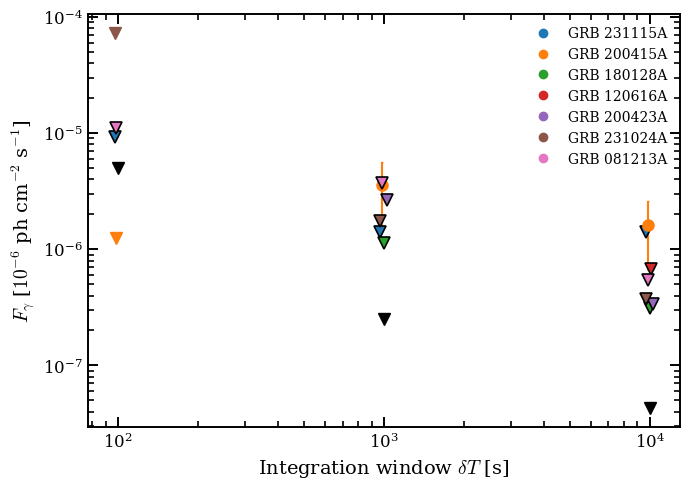

Saved: lat_flux_points_with_stacking_marks.pdf
Stacked at   100 s: N=2 -> ['GRB 081213A', 'GRB 231115A']
Stacked at  1000 s: N=5 -> ['GRB 081213A', 'GRB 180128A', 'GRB 200423A', 'GRB 231024A', 'GRB 231115A']
Stacked at 10000 s: N=6 -> ['GRB 081213A', 'GRB 120616A', 'GRB 180128A', 'GRB 200423A', 'GRB 231024A', 'GRB 231115A']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# ============================================================
# INPUTS
# ============================================================

# Per-burst photon fluxes (0.1–10 GeV), units of 1e-6 ph cm^-2 s^-1
# Format: (kind, value, error) where kind in {"ul","det"}; error only for detections.
data = {
    "GRB 231115A": {100: ("ul", 9.28, None), 1000: ("ul", 1.40, None), 10000: ("ul", 1.40, None)},
    "GRB 200415A": {100: ("ul", 1.26, None), 1000: ("det", 3.60, 2.00), 10000: ("det", 1.62, 0.96)},
    "GRB 180128A": {1000: ("ul", 1.13, None), 10000: ("ul", 0.315, None)},
    "GRB 120616A": {10000: ("ul", 0.67, None)},
    "GRB 200423A": {1000: ("ul", 2.67, None), 10000: ("ul", 0.34, None)},
    "GRB 231024A": {100: ("ul", 73.1, None), 1000: ("ul", 1.74, None), 10000: ("ul", 0.37, None)},
    "GRB 081213A": {100: ("ul", 11.1, None), 1000: ("ul", 3.69, None), 10000: ("ul", 0.548, None)},
}
durations = [100, 1000, 10000]

# Which bursts were stacked for each integration window?
# (Edit if your stacking script used different inclusion criteria.)
# GRB 200415A is excluded from stacking.
stacked_by_dt = {
    100:   {"GRB 231115A", "GRB 081213A"},
    1000:  {"GRB 231115A", "GRB 180128A", "GRB 200423A", "GRB 231024A", "GRB 081213A"},
    10000: {"GRB 231115A", "GRB 180128A", "GRB 120616A", "GRB 200423A", "GRB 231024A", "GRB 081213A"},
}

# Stacked ULs from your stacking run (integrated photon flux in 0.1–100 GeV), ph cm^-2 s^-1
# Replace these if your script output differs.
stack_ul_0p1_100 = {100: 5.09e-06, 1000: 2.51e-07, 10000: 4.31e-08}

def ph_band_convert(Fph, gamma=-2.0, Emin_in=0.1, Emax_in=100.0, Emin_out=0.1, Emax_out=10.0):
    """
    Convert integrated photon flux between energy bands for a PL dN/dE ∝ E^gamma (E in GeV).
    """
    if abs(gamma + 1.0) < 1e-14:
        I_in  = np.log(Emax_in / Emin_in)
        I_out = np.log(Emax_out / Emin_out)
    else:
        I_in  = (Emax_in**(gamma+1)  - Emin_in**(gamma+1))  / (gamma+1)
        I_out = (Emax_out**(gamma+1) - Emin_out**(gamma+1)) / (gamma+1)
    return Fph * (I_out / I_in)

# Convert stacked ULs to 0.1–10 GeV photon flux to match per-burst band
stack_ul_0p1_10 = {
    dt: ph_band_convert(F, gamma=-2.0, Emin_in=0.1, Emax_in=100.0, Emin_out=0.1, Emax_out=10.0)
    for dt, F in stack_ul_0p1_100.items()
}

# ============================================================
# STYLE (ApJ-friendly)
# ============================================================
mpl.rcParams.update({
    "figure.figsize": (7, 5),
    "savefig.dpi": 300,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 10,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "axes.linewidth": 1.4,
    "font.family": "serif",
    "mathtext.fontset": "cm",
})

# ============================================================
# PLOT
# ============================================================
fig, ax = plt.subplots()

events = list(data.keys())
colors = {grb: f"C{i%10}" for i, grb in enumerate(events)}

# small log-jitter so overlapping points at same dt are separable
jitter_ln = 0.015

handles_evt, labels_evt = [], []

# Border thickness for "stacked-membership" marking
# (You asked for thinner than before.)
mew_stacked = 1.5   # try 1.3–1.6 range
mew_normal  = 1.0

for i, (grb, series) in enumerate(data.items()):
    col = colors[grb]

    # legend handle (color only)
    h, = ax.plot([], [], marker='o', linestyle='None', color=col)
    handles_evt.append(h)
    labels_evt.append(grb)

    for dt in durations:
        if dt not in series:
            continue

        kind, val, err = series[dt]

        # convert to physical units (ph cm^-2 s^-1)
        y = val * 1e-6
        yerr = None if err is None else err * 1e-6

        x = dt * np.exp(((i % 5) - 2) * jitter_ln)

        # stacked marking: black border ONLY if this burst was included in stacking for this dt
        is_stacked_here = (dt in stacked_by_dt) and (grb in stacked_by_dt[dt])
        mec = "black" if is_stacked_here else col
        mew = 1.2 if is_stacked_here else 1.0

        if kind == "det":
            ax.errorbar(
                x, y, yerr=yerr, fmt='o',
                color=col, mfc=col, mec=mec, mew=mew,
                markersize=8, capsize=1
            )
        else:
            ax.errorbar(
                x, y, fmt='v',
                color=col, mfc=col, mec=mec, mew=mew,
                markersize=8, capsize=1, uplims=True
            )


# --- Add stacked ULs as BLACK downward triangles (uplims) ---
# (These are the *stacking results*; separate from the "stacked-membership" border marking.)
for dt in durations:
    if dt not in stack_ul_0p1_10:
        continue
    ax.errorbar(
        dt, stack_ul_0p1_10[dt], fmt='v',
        color='black', mfc='black', mec='black', mew=1.0,
        markersize=8, capsize=3, uplims=True
    )

# axes
# axes, ticks
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel(r'Integration window $\delta T$ [s]')
ax.set_ylabel(r'$F_\gamma$ [$10^{-6}$ ph cm$^{-2}$ s$^{-1}$]')

ax.tick_params(which='both', direction='in', top=True, right=True)

ax.legend(handles_evt, labels_evt, loc='upper right', frameon=False)

fig.tight_layout()
fig.savefig("lat_flux_points_with_stacking_marks.pdf")
plt.show()

print("Saved: lat_flux_points_with_stacking_marks.pdf")

# Quick sanity print: how many events stacked per dt
for dt in durations:
    s = stacked_by_dt.get(dt, set())
    print(f"Stacked at {dt:5d} s: N={len(s)} -> {sorted(s)}")
